In [1]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import re
import numpy as np
import seaborn as sns
## for the stats class
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
import timeit
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd
from datetime import datetime
import pytz
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from skimage import io
from patchify import patchify, unpatchify
%matplotlib inline

import collections
# from itertools import chain
# import urllib.request as request
# import pickle

import numpy as np

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

# import cv2
from sklearn import preprocessing

# from libsvm import svmutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [170]:
def plot_confusion_matrix(y_test, y_test_pred, model_name):
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    group_names = ['True Negative (TN)', 'False Positive (FP)',
                'False Negative (FN)', 'True Positive (TP)']
    group_counts = ["{0:0.0f}".format(value) for value in test_confusion_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in test_confusion_matrix.flatten()/np.sum(test_confusion_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Creating the heatmap
    plt.figure(figsize=(8,5))
    sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Blues', vmin = 0)
    plt.title("Confusion Matrix for "+ model_name+ " (using Test Set)")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [156]:
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
# fog_aware_pivot = pd.read_csv('fog_aware_stats_no_patches_pivot.csv')
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
fog_aware_pivot = pd.read_csv('fog_aware_stats_horizontal_3_patches_pivot.csv')
fog_aware_pivot['Label_train'] = 1*(fog_aware_pivot['Label']=='foggy')
fog_aware_pivot

,photo,Label,site,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,...,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_train
0,2022_07-04.0000_agatebeachor.jpg,not_foggy,agatebeachor,0,0.220805,0.285012,0.099900,0.065638,0.106588,0.034401,...,28.0,6.0,14.0,0.000000,0.000000,0.000000,85.593872,51.769043,10.103722,0
1,2022_07-04.0000_otterrockor.jpg,not_foggy,otterrockor,0,0.725298,0.720047,0.691137,0.493167,0.477681,0.461369,...,2.0,4.0,0.0,0.244513,0.152914,0.160079,90.752732,158.670973,166.963307,0
2,2022_07-04.0700_agatebeachor.jpg,not_foggy,agatebeachor,7,0.096299,0.131353,0.173731,0.015461,0.041110,0.050096,...,64.0,24.0,37.0,0.000000,0.000000,0.000000,35.000917,18.467704,9.174465,0
3,2022_07-04.0730_agatebeachor.jpg,not_foggy,agatebeachor,7,0.101561,0.205493,0.325304,0.016175,0.091502,0.142794,...,95.0,13.0,20.0,0.063917,0.072188,0.164992,105.608782,106.996344,147.341268,0
4,2022_07-04.0730_otterrockor.jpg,not_foggy,otterrockor,7,0.251876,0.576411,0.588961,0.082378,0.292454,0.396829,...,7.0,0.0,0.0,0.099916,0.042100,0.124894,110.066753,189.517876,183.865692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,agatebeachor,19,0.176457,0.743293,0.523022,0.083535,0.457137,0.265502,...,70.0,0.0,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656,0
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,cannonbeach,19,0.164592,0.585149,0.640644,0.042335,0.314184,0.390172,...,0.0,0.0,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957,0
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,otterrockor,20,0.282921,0.442290,0.345411,0.136875,0.235093,0.183542,...,22.0,3.0,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589,0
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,otterrockor,20,0.193967,0.582705,0.378667,0.059283,0.307785,0.207709,...,26.0,0.0,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567,0


In [157]:
fog_aware_pivot[['Label_train', 'Label']].value_counts()

Label_train  Label    
0            not_foggy    6374
1            foggy        1622
dtype: int64

In [71]:
fog_aware_pivot
np.array(fog_aware_pivot.columns[fog_aware_pivot.columns.str.contains(r'_1|Label$')])

array(['Label', 'mscn_var_1', 'vertical_var_1', 'sharpness_1',
       'coef_or_var_sharpness_1', 'rms_contrast_1', 'entropy_1',
       'dark_channel_prior_1', 'color_sat_1', 'CF_1'], dtype=object)

In [158]:
# g = sns.pairplot(fog_aware_pivot.drop(['photo', 'site', 'hour', 'Label_train'], axis = 1)
#                  , hue = 'Label', palette={'foggy': 'blue', 'not_foggy': 'green'}, markers=["o", "D"]
#                  , corner=True)

# g = sns.pairplot(fog_aware_pivot[fog_aware_pivot.columns[fog_aware_pivot.columns.str.contains(r'_1|Label$')]]
#                  , hue = 'Label', palette={'foggy': 'blue', 'not_foggy': 'green'}, markers=["o", "D"]
#                  , corner=True)


In [159]:
# X = np.array(fog_aware_pivot.drop(['photo', 'Label', 'site', 'hour', 'Label_train'], axis = 1)
#             )

# to_keep = ['mscn_var',
# 'vertical_var',
# # 'sharpness',
# # 'coef_or_var_sharpness'
# # 'rms_contrast'
#           ]

to_keep_3_patches = ['mscn_var_1',
'vertical_var_1',
# 'sharpness_1',
# 'coef_or_var_sharpness_1',
'rms_contrast_1']

X = np.array(fog_aware_pivot[to_keep_3_patches]
            )
y = fog_aware_pivot['Label_train']

# Separate the data into classes
class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]

# Sample an equal number of samples from each class
num_samples_per_class = min(len(class_0_indices), len(class_1_indices))

# Randomly sample indices for each class
sampled_indices_class_0 = np.random.choice(class_0_indices, num_samples_per_class, replace=False)
sampled_indices_class_1 = np.random.choice(class_1_indices, num_samples_per_class, replace=False)

# Combine the sampled indices
sampled_indices = np.concatenate([sampled_indices_class_0, sampled_indices_class_1])

# Use the sampled indices to create the balanced training set
X_balanced = X[sampled_indices]
y_balanced = y[sampled_indices]

# Check the balance in y_train_balanced
print(np.bincount(y_balanced))

scaler = preprocessing.StandardScaler().fit(X_balanced)
X_scaled = scaler.transform(X_balanced)


X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_balanced, test_size=0.30, random_state=42, stratify = y_balanced)

n_classes = len(np.unique(y_train))


[1622 1622]


In [161]:
gmm = GaussianMixture(n_components=n_classes
                    ,covariance_type='diag'
                      # , init_params='random_from_data'
                     )
gmm.fit(X_train)
y_train_pred = gmm.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train) 
print( 'Train accuracy: %.2f' % train_accuracy)

y_test_pred = gmm.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel())
print('Test accuracy: %.2f' % test_accuracy)


Train accuracy: 0.79
Test accuracy: 0.80


In [162]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
# roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# print("AUC-ROC Score:", roc_auc)

Accuracy: 0.8049281314168378
Precision: 0.8087318087318087
Recall: 0.7987679671457906
F1 Score: 0.8037190082644629


In [164]:
compare = pd.DataFrame({'actual':y_test, 'pred':y_test_pred})
pd.crosstab(compare['pred'], compare['actual'])

actual,0,1
pred,,
0,395,98
1,92,389


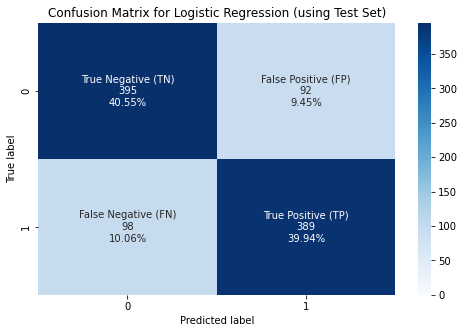

In [171]:
plot_confusion_matrix(y_test, y_test_pred, "GMM")

In [97]:
gmm.predict_proba(X_test)

array([[9.99999999e-01, 7.70222964e-10],
       [9.86462685e-01, 1.35373147e-02],
       [1.87975211e-08, 9.99999981e-01],
       ...,
       [1.00000000e+00, 4.63735144e-16],
       [1.00000000e+00, 2.98963405e-26],
       [1.00000000e+00, 1.71512365e-16]])

In [102]:
gmm.predict_proba(X_test)

array([[9.99999999e-01, 7.70222964e-10],
       [9.86462685e-01, 1.35373147e-02],
       [1.87975211e-08, 9.99999981e-01],
       ...,
       [1.00000000e+00, 4.63735144e-16],
       [1.00000000e+00, 2.98963405e-26],
       [1.00000000e+00, 1.71512365e-16]])

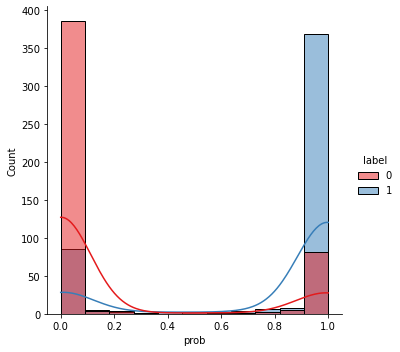

In [172]:
df = pd.DataFrame({'prob':y_scores,'label':y_test })
sns.displot(data=df, x='prob', hue='label', kde=True, palette='Set1')

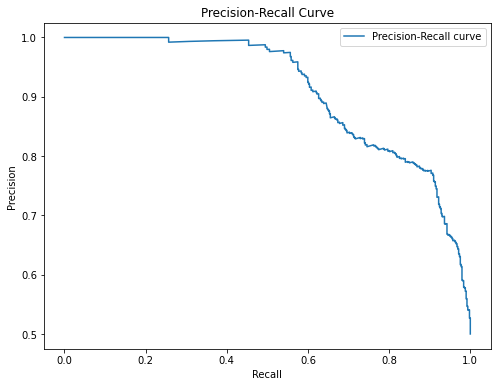

In [166]:
y_scores = gmm.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [94]:
print(thresholds)

[2.00000000e+000 1.00000000e+000 9.99999999e-001 9.99999999e-001
 9.99999996e-001 9.99999996e-001 9.99999992e-001 9.99999991e-001
 9.99999991e-001 9.99999990e-001 9.99999989e-001 9.99999989e-001
 9.99999986e-001 9.99999986e-001 9.99999984e-001 9.99999984e-001
 9.99999983e-001 9.99999983e-001 9.99999981e-001 9.99999980e-001
 9.99999975e-001 9.99999973e-001 9.99999972e-001 9.99999972e-001
 9.99999969e-001 9.99999967e-001 9.99999965e-001 9.99999965e-001
 9.99999964e-001 9.99999964e-001 9.99999960e-001 9.99999958e-001
 9.99999958e-001 9.99999957e-001 9.99999956e-001 9.99999954e-001
 9.99999953e-001 9.99999952e-001 9.99999950e-001 9.99999950e-001
 9.99999950e-001 9.99999947e-001 9.99999942e-001 9.99999941e-001
 9.99999939e-001 9.99999937e-001 9.99999936e-001 9.99999927e-001
 9.99999921e-001 9.99999915e-001 9.99999909e-001 9.99999909e-001
 9.99999899e-001 9.99999895e-001 9.99999893e-001 9.99999889e-001
 9.99999879e-001 9.99999877e-001 9.99999876e-001 9.99999871e-001
 9.99999868e-001 9.999998

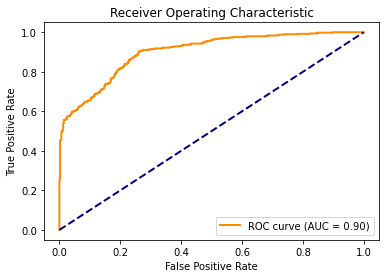

In [167]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gmm.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()